# Data Science Nigeria: Introductory Machine Learning Training

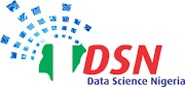

In [43]:
from IPython.display import Image
PATH = "C:/Users/HP/Documents/Week4"
Image(filename = PATH + "/DSN.jpg", width=600, height=300)

# WEEK 4: INTRODUCTION TO CLASSIFICATION

Binary/ Multi-class classification 

Classification Algorithms 

Evaluation of Classification Models Performance 

Error/ Cost function 

Confusion matrix 

Precision  

AUC 


In Classification, we predict the category a data belongs to ie. Classification algorithms are used to predict labels
* Spam Detection
* Churn Prediction
* Sentiment Analysis
* Dog Breed Detection

### TYPES OF CLASSIFICATION TASK

* Binary classification eg. e-mail spam detection (1 ->spam; or 0→not spam), biometric identification, whether a customer will default or Not
* Multi-class classification eg. digit recognition (where classes go from 0 to 9), predicting a party that wins the election,  

 <img src= './class.png', alt = "Data Science Nigeria" width= 600, height = 300/>

Classification Algorithms
1.	Logistic Regression         
2.  Naive Bayes Classifier
3.	Nearest Neighbor			
4. 	Support Vector Machines
5.	Decision Trees				
6. 	Boosted Trees
7.  Random Forest	            


## Import Modules 

In [44]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [45]:
data= pd.read_csv("Social_Network_Ads.csv", delimiter= ",")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [46]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

## Pre-processing Data

In [47]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Gender']=le.fit_transform(data['Gender'])

In [48]:
data['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [49]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


## Exploratory analysis

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(5)
memory usage: 15.7 KB


In [51]:
# employees that did not buy and those that bought

left= data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [52]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


## Data Visualization

Users that purchased these Ads

In [53]:
left_count = left.count()

In [54]:
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


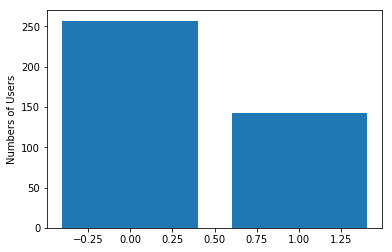

In [55]:
#how many users were in each category ?

plt.bar(left_count.index.values, left_count['User ID'])
plt.ylabel("Numbers of Users")
plt.show()

In [56]:
# ratio of users that did bought the Ads were only 36%

data.Purchased.value_counts()
float(data.Purchased.value_counts()[1])/len(data) * 100

35.75

### A little bit of feature engineering !

1) Using an Age category

IGen[1-24], Millenials[24-39], GenX[40-54], BabyBoomers[55-73] 

In [57]:
data['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else None \
  for age in list(data['Age'].values)]

In [58]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


2) Using an Income category [Inter-quartile Ranges]

In [59]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [60]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,iGen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,iGen,Medium


Lets see the Visuals

In [61]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

In [62]:
age_cat

,User ID,Gender,Age,EstimatedSalary,Purchased,Income Category
Age Category,,,,,,
BabyBoomers,28,28,28,28,28,28
GenX,134,134,134,134,134,134
Millenials,195,195,195,195,195,195
iGen,43,43,43,43,43,43


In [63]:
inc_cat

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
Income Category,,,,,,
Low,134,134,134,134,134,134
Medium,138,138,138,138,138,138
High,128,128,128,128,128,128


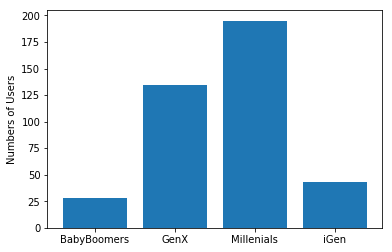

In [64]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

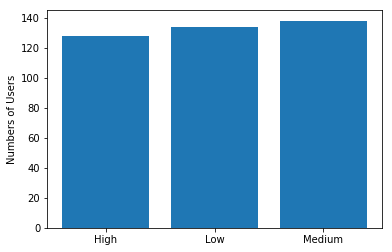

In [65]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

In [66]:
# data[data['Income Category'] == 'High'].max()

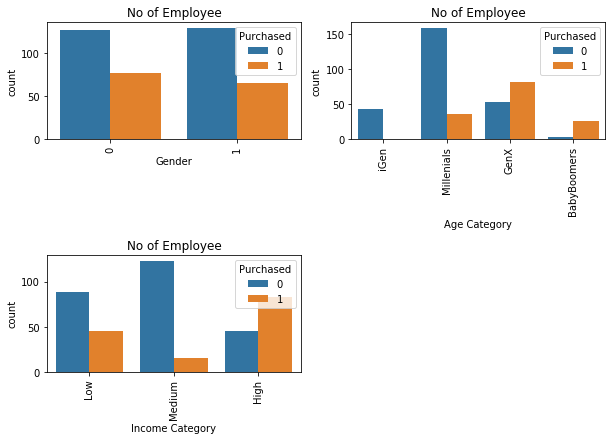

In [67]:
#whats the statistics based on those who did not make purchase

features= ['Gender', 'Age Category', 'Income Category']
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data , hue= "Purchased")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

## Model building

In [68]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [69]:
# split data into features and target

x = data[['Gender','Age Category', 'Income Category']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

#### Assignment: Use engineered features i.e new columns in training your model. Confirm if it improves our models significantly or not ?

### Algorithm/ Model 1 : Naive Bayes

In [74]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: 'High'

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [71]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

In [ ]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

In [ ]:
conftable(y_test,y_pred,"conf")

In [ ]:
# Ground Truth
pd.Series(y_test).value_counts()

### Algorithm/ Model 2 : Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Algorithm/ Model 3 : Random Forest

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

### Extra Algorithm/ Model 4 : XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

# Assignment